In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [54]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [55]:
X = df[['Age','Income($)']].values

In [56]:
X[:5]

array([[    27,  70000],
       [    29,  90000],
       [    29,  61000],
       [    28,  60000],
       [    42, 150000]], dtype=int64)

Text(0, 0.5, 'Income($)')

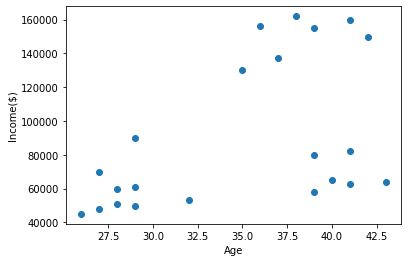

In [57]:
# as there are only 2features we plot these features on coordinate axis
# by observing the below plot we can conclued that there might be 3 clusters(groups)

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [58]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(X)
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [59]:
df['cluster'] = y_pred
# as there are only 2features we plot these features on coordinate axis
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [60]:
# from below we can get 3 centroids each with dimension 2 because there are only 2 features
# each row is a coordinate of each centroid
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

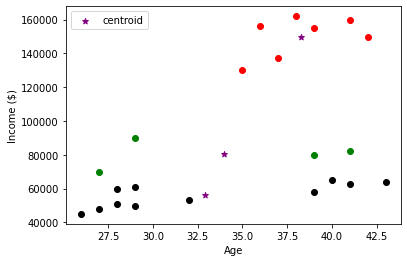

In [61]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'], color='green')
plt.scatter(df2.Age,df2['Income($)'], color='red')
plt.scatter(df3.Age,df3['Income($)'], color='black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
            color='purple', marker='*', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Income($)'] = scaler.fit_transform(df[['Income($)']].values)
df['Age'] = scaler.fit_transform(df[['Age']].values)
# df[['Income($)', 'Age']] = scaler.fit_transform(df[['Income($)', 'Age']].values)

In [63]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [64]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income($)']].values)
y_pred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [65]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [66]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

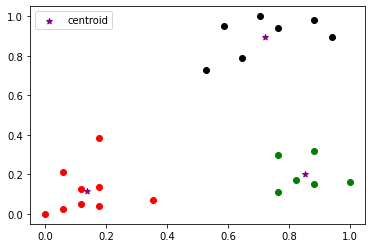

In [67]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'], color='green')
plt.scatter(df2.Age,df2['Income($)'], color='red')
plt.scatter(df3.Age,df3['Income($)'], color='black')
plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.legend()

In [71]:
# now the centroids are perfect fit to the data
# before clusterning or any ml or dl tasks we need to scale the data

<h4 style='color:purple'>Elbow Plot</h4>

In [72]:
# procedure to draw elbow_plot
# first take 1 cluster
# then find centroid of cluster
# then calculate the sum_of_squares from all the data points to that cluster
# store the result in sse array

# now take 2 clusters
# find the centroids of 2 clusters
# find sum_of_squares from the corresponding centroids to corresponding clusters(2centroids and 2clus)
# now sum the two squared_erros sse1 + sse2
# now store the result in sse array

In [68]:
# sse for 2 clusters is sse1 + sse2
# sse for 3 clusters is sse1 + sse2 + sse3
# for 9 clusters is sse1 + sse2 +...... + sse9
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']].values)
    # inertia_ will give all sse1 + sse2 + .... + sse9 
    sse.append(km.inertia_)

In [69]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.22037641690770673,
 0.1685851223602976,
 0.13762504146528043,
 0.10188787724979426]

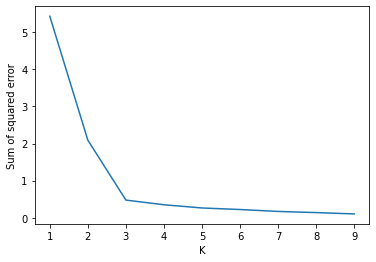

In [70]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

In [73]:
# from elbow plot sse is minimum for 3 clusters